### Q1. [3 points] Build a logistic regression predicting partisanship.

In [7]:
# importing libraries


from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns

In [8]:
FX_indicators_2020_df = pd.read_csv('FX_indicators_2020.csv')

In [12]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,MOVED_RDMA,MOVED_DRMA,MOVED_AWMA,MOVED_ADMA,MOVED_ARMA,MOVED_RDMB,MOVED_DRMB,MOVED_AWMB,MOVED_ADMB,MOVED_ARMB
0,84508,3,0,25,4,0,0,38,39,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,608312,1,0,35,0,0,3,46,46,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,222821,3,0,73,3,0,0,42,36,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,137882,2,0,54,1,1,0,37,34,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,531303,2,0,51,0,3,0,46,46,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384982,430307,2,0,64,3,0,0,32,32,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384983,189580,1,55,23,5,0,1,38,39,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384984,137630,2,0,29,0,1,1,36,37,35,...,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N
384985,140246,2,0,68,1,0,0,33,32,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
FX_indicators_2020_df.describe()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,PRS16_PD,PRS16_PR,MSG_A,MSG_B
count,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,...,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000
mean,318457.590755,2.002221,0.570999,50.864408,1.205781,0.730287,0.618231,39.256326,37.093512,41.493762,...,0.982771,0.044602,0.145909,0.530914,0.534854,12.610530,46.943522,51.377199,0.077829,0.077764
std,183665.590377,0.816945,5.323766,18.141040,1.306398,1.063950,0.950737,6.934079,7.190315,7.296544,...,0.678549,0.330575,0.480255,0.521946,0.537452,1.089046,5.754449,5.814682,0.267902,0.267800
min,2.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,34.100000,17.000000,0.000000,0.000000
25%,159325.500000,1.000000,0.000000,36.000000,0.000000,0.000000,0.000000,34.000000,32.000000,35.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,42.800000,47.800000,0.000000,0.000000
50%,318561.000000,2.000000,0.000000,51.000000,1.000000,0.000000,0.000000,38.000000,36.000000,41.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,12.000000,45.800000,52.500000,0.000000,0.000000
75%,477540.000000,3.000000,0.000000,65.000000,2.000000,1.000000,1.000000,44.000000,40.000000,48.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,13.000000,50.400000,55.600000,0.000000,0.000000
max,636572.000000,3.000000,100.000000,113.000000,9.000000,9.000000,9.000000,65.000000,65.000000,65.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,16.000000,80.600000,64.300000,1.000000,1.000000


In [14]:
FX_indicators_2020_df.dtypes

VOTER_ID       int64
SET_NO         int64
OPP_SEX        int64
AGE            int64
HH_ND          int64
               ...  
MOVED_RDMB    object
MOVED_DRMB    object
MOVED_AWMB    object
MOVED_ADMB    object
MOVED_ARMB    object
Length: 152, dtype: object

In [15]:
FX_indicators_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384987 entries, 0 to 384986
Columns: 152 entries, VOTER_ID to MOVED_ARMB
dtypes: float64(2), int64(105), object(45)
memory usage: 446.5+ MB


In [16]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(384987, 152)
VOTER_ID           0
SET_NO             0
OPP_SEX            0
AGE                0
HH_ND              0
               ...  
MOVED_RDMB    371383
MOVED_DRMB    371383
MOVED_AWMB    371383
MOVED_ADMB    371383
MOVED_ARMB    371383
Length: 152, dtype: int64


In [17]:
FX_indicators_2020_df.isnull().any()

VOTER_ID      False
SET_NO        False
OPP_SEX       False
AGE           False
HH_ND         False
              ...  
MOVED_RDMB     True
MOVED_DRMB     True
MOVED_AWMB     True
MOVED_ADMB     True
MOVED_ARMB     True
Length: 152, dtype: bool

In [18]:
FX_indicators_2020_df.drop(columns = ['CAND1S', 'CAND2S', 'MESSAGE'], axis=1, inplace=True)

In [19]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'COMM_LT10':'ED_4COL'].columns, axis = 1)

In [20]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'H_AFDLN3P':'MSG_B'].columns, axis = 1)

In [21]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'CAND1_UND':'MOVED_ARMB'].columns, axis = 1)

In [22]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,NH_MULT,HISP,GENDER_F,GENDER_M,VG_14_DV,D2,R2,D3,R3,I3
0,84508,3,0,25,4,0,0,38,39,38,...,1,4,0,1,NaN,Y,N,Y,N,N
1,608312,1,0,35,0,0,3,46,46,46,...,3,3,1,0,NaN,NaN,NaN,N,N,Y
2,222821,3,0,73,3,0,0,42,36,48,...,2,14,1,0,N,NaN,NaN,N,N,N
3,137882,2,0,54,1,1,0,37,34,51,...,0,4,1,0,Y,Y,N,Y,N,N
4,531303,2,0,51,0,3,0,46,46,46,...,3,3,0,1,Y,Y,N,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384982,430307,2,0,64,3,0,0,32,32,33,...,2,5,0,1,NaN,Y,N,Y,N,N
384983,189580,1,55,23,5,0,1,38,39,38,...,1,4,0,1,N,Y,N,Y,N,N
384984,137630,2,0,29,0,1,1,36,37,35,...,1,3,1,0,N,NaN,NaN,N,N,Y
384985,140246,2,0,68,1,0,0,33,32,34,...,1,39,1,0,NaN,N,Y,N,Y,N


In [23]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(384987, 26)
VOTER_ID         0
SET_NO           0
OPP_SEX          0
AGE              0
HH_ND            0
HH_NR            0
HH_NI            0
MED_AGE          0
MED_AGE_M        0
MED_AGE_F        0
NH_WHITE         0
NH_AA            0
NH_NATAM         0
NH_ASIAN         0
NH_HPI           0
NH_OTHER         0
NH_MULT          0
HISP             0
GENDER_F         0
GENDER_M         0
VG_14_DV     98701
D2           92878
R2           92878
D3               0
R3               0
I3           48094
dtype: int64


In [24]:
FX_indicators_2020_df.dropna(inplace=True)

In [25]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,NH_MULT,HISP,GENDER_F,GENDER_M,VG_14_DV,D2,R2,D3,R3,I3
3,137882,2,0,54,1,1,0,37,34,51,...,0,4,1,0,Y,Y,N,Y,N,N
4,531303,2,0,51,0,3,0,46,46,46,...,3,3,0,1,Y,Y,N,Y,N,N
8,333636,3,0,35,1,1,0,31,24,34,...,1,35,1,0,N,N,Y,N,Y,N
9,332197,3,0,74,2,0,1,37,37,38,...,7,2,0,1,Y,Y,N,Y,N,N
14,367936,1,0,75,0,2,0,50,49,52,...,1,17,0,1,Y,N,Y,N,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384974,488310,2,0,43,2,0,0,46,46,46,...,3,3,1,0,N,Y,N,Y,N,N
384975,519934,2,0,78,1,0,0,36,36,37,...,1,3,1,0,Y,Y,N,Y,N,N
384976,78670,2,0,47,2,0,0,40,37,42,...,2,7,1,0,Y,N,Y,N,Y,N
384981,174573,1,0,44,0,1,3,25,22,31,...,2,2,1,0,N,N,Y,N,Y,N


In [26]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(186070, 26)
VOTER_ID     0
SET_NO       0
OPP_SEX      0
AGE          0
HH_ND        0
HH_NR        0
HH_NI        0
MED_AGE      0
MED_AGE_M    0
MED_AGE_F    0
NH_WHITE     0
NH_AA        0
NH_NATAM     0
NH_ASIAN     0
NH_HPI       0
NH_OTHER     0
NH_MULT      0
HISP         0
GENDER_F     0
GENDER_M     0
VG_14_DV     0
D2           0
R2           0
D3           0
R3           0
I3           0
dtype: int64


In [27]:
FX_indicators_2020_df_new = pd.get_dummies(FX_indicators_2020_df)

In [28]:
FX_indicators_2020_df_new

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,D2_N,D2_Y,R2_N,R2_Y,D3_N,D3_Y,R3_N,R3_Y,I3_N,I3_Y
3,137882,2,0,54,1,1,0,37,34,51,...,0,1,1,0,0,1,1,0,1,0
4,531303,2,0,51,0,3,0,46,46,46,...,0,1,1,0,0,1,1,0,1,0
8,333636,3,0,35,1,1,0,31,24,34,...,1,0,0,1,1,0,0,1,1,0
9,332197,3,0,74,2,0,1,37,37,38,...,0,1,1,0,0,1,1,0,1,0
14,367936,1,0,75,0,2,0,50,49,52,...,1,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384974,488310,2,0,43,2,0,0,46,46,46,...,0,1,1,0,0,1,1,0,1,0
384975,519934,2,0,78,1,0,0,36,36,37,...,0,1,1,0,0,1,1,0,1,0
384976,78670,2,0,47,2,0,0,40,37,42,...,1,0,0,1,1,0,0,1,1,0
384981,174573,1,0,44,0,1,3,25,22,31,...,1,0,0,1,1,0,0,1,1,0


In [29]:
X = FX_indicators_2020_df_new.drop(columns = ['VG_14_DV_Y','VG_14_DV_N', 'D2_N', 'D2_Y', 'R2_N', 'R2_Y', 'D3_N', 'D3_Y',
                                              'R3_N', 'R3_Y','I3_N', 'I3_Y'])
y = FX_indicators_2020_df_new['D2_Y']

In [30]:
X

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,NH_WHITE,NH_AA,NH_NATAM,NH_ASIAN,NH_HPI,NH_OTHER,NH_MULT,HISP,GENDER_F,GENDER_M
3,137882,2,0,54,1,1,0,37,34,51,61,34,1,0,0,0,0,4,1,0
4,531303,2,0,51,0,3,0,46,46,46,88,2,0,4,0,0,3,3,0,1
8,333636,3,0,35,1,1,0,31,24,34,46,19,0,0,0,0,1,35,1,0
9,332197,3,0,74,2,0,1,37,37,38,54,37,0,1,0,0,7,2,0,1
14,367936,1,0,75,0,2,0,50,49,52,82,0,0,0,0,0,1,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384974,488310,2,0,43,2,0,0,46,46,46,88,2,0,4,0,0,3,3,1,0
384975,519934,2,0,78,1,0,0,36,36,37,78,5,0,12,0,1,1,3,1,0
384976,78670,2,0,47,2,0,0,40,37,42,42,45,0,1,0,5,2,7,1,0
384981,174573,1,0,44,0,1,3,25,22,31,62,26,0,7,0,2,2,2,1,0


In [31]:
y

3         1
4         1
8         0
9         1
14        0
         ..
384974    1
384975    1
384976    0
384981    0
384983    1
Name: D2_Y, Length: 186070, dtype: uint8

In [32]:
 from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [33]:
logreg = LogisticRegression()

In [34]:
logreg = logreg.fit(X_train,y_train)

In [47]:
#Predict the response for test dataset
y_pred = logreg.predict(X_test)

In [48]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [49]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6265025707171137


In [50]:
# Predict for 1 observation
logreg.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
logreg.predict(X_test[0:100])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [51]:
# The score method returns the accuracy of the model
score = logreg.score(X_test, y_test)
print(score)

0.6265025707171137


In [55]:
from sklearn.metrics import confusion_matrix #confusion_matrix 
confusion_matrix(y_test, y_pred)

array([[    0, 20849],
       [    0, 34972]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report # classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     20849
           1       0.63      1.00      0.77     34972

    accuracy                           0.63     55821
   macro avg       0.31      0.50      0.39     55821
weighted avg       0.39      0.63      0.48     55821



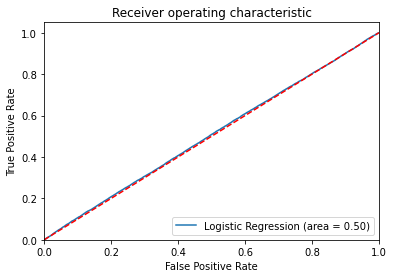

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

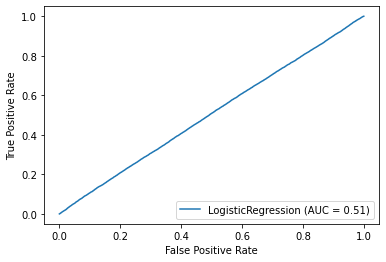

In [60]:
from sklearn.metrics import plot_roc_curve # roc_curve
plot_roc_curve(logreg, X_test, y_test)

In [61]:
prob = logreg.predict_proba(X_test[0:100])

In [62]:
prob

array([[0.36649819, 0.63350181],
       [0.35557967, 0.64442033],
       [0.38286689, 0.61713311],
       [0.38448646, 0.61551354],
       [0.35201947, 0.64798053],
       [0.38005647, 0.61994353],
       [0.34797492, 0.65202508],
       [0.36088116, 0.63911884],
       [0.36173476, 0.63826524],
       [0.37803327, 0.62196673],
       [0.37626537, 0.62373463],
       [0.34665739, 0.65334261],
       [0.37895216, 0.62104784],
       [0.35365187, 0.64634813],
       [0.36658645, 0.63341355],
       [0.36881575, 0.63118425],
       [0.3998148 , 0.6001852 ],
       [0.40381716, 0.59618284],
       [0.37148861, 0.62851139],
       [0.38129579, 0.61870421],
       [0.37637112, 0.62362888],
       [0.38620881, 0.61379119],
       [0.39100798, 0.60899202],
       [0.376874  , 0.623126  ],
       [0.38785209, 0.61214791],
       [0.34246204, 0.65753796],
       [0.36667952, 0.63332048],
       [0.37492729, 0.62507271],
       [0.38327612, 0.61672388],
       [0.37804038, 0.62195962],
       [0.